# 1 | Eigenvalue Problem

In [1]:
import numpy as np
from scipy.io import mminfo,mmread
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.linalg import inv, eig
from numpy import sqrt, dot, sum, abs, diag, array

## Eigenvalue Problems

In order to test different algorithms to compute eigenvalues we use a 4x4 matrix with eigenvalues 1, 2, 3, and 4.
It is constructed as 
$$ A = S D S^{-1} $$
where $D$ is a diagonal matrix containing the EVs.

In [2]:
np.random.seed(1)
D = np.array([1, 2, 3 ,4])
S = (np.random.rand(len(D),len(D)) - 0.5)*2 # compute a random matrix with entries between -1 and 1
A = np.dot(np.dot(S,np.diag(D)),inv(S)) # S*D*S^-1, computes a unitary similar matrix of D having the same EVs

In [3]:
#test if correct?
w,v=np.linalg.eig(A)
w,v,A

(array([ 1.,  4.,  3.,  2.]),
 array([[ 0.17314452, -0.55622662, -0.65739702,  0.36761094],
        [ 0.73709037, -0.43458468, -0.41259759, -0.68018217],
        [ 0.21540826,  0.52119875, -0.10626688,  0.06476564],
        [ 0.61669931,  0.47968736, -0.62153015,  0.63088812]]),
 array([[ 4.00554954,  0.01354906,  1.19192526, -1.27636247],
        [ 2.77659659,  1.49989982,  3.16264938, -2.48173559],
        [ 1.45212322, -0.48865181,  6.86559345, -1.8724586 ],
        [ 4.12225091, -0.92237257,  9.49381671, -2.37104281]]))

### Vector Interation

* also known as power mthod, power iteration, or von Mises iteration
* yields largest (in magnitude) eigenvalue and corresponding eigenvector
* converges baldy if $\lambda_n/\lambda_{n-1} \approx 1$, i.e. the second largest EV is almost the same size as the largest

Use the recursion
$$ b_{k+1} = \frac{A b_k}{\lVert A_k b_k \rVert}$$

where $b_k$ converges to the eigenvector and ${\lVert A_k b_k \rVert}$ to the eigenvalue.

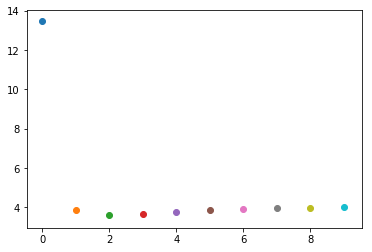

In [4]:
x = np.ones(len(D)) # one can start with any vector

for i in range(10) :
    # compute numerator
    num=np.dot(A,x)
    # compute denominator
    den=np.linalg.norm(np.dot(A,x))
    # compute recursion
    x=num/den
    # plot the intermediate results
    plt.scatter(i, den)
    
    pass

In [5]:
print("Largest EWert found:")
print(den) #largest EW
print("corresponding EVector:")
print(x) #corresponding EV

v[:,1] #test für EV (for i=20 iterations the EV will be much better!)


Largest EWert found:
4.00761798293
corresponding EVector:
[-0.47170868 -0.38198032  0.54595268  0.57750985]


array([-0.55622662, -0.43458468,  0.52119875,  0.47968736])

### Inverse Vector Iteration

If $\lambda$ is an eigenvalue of $A$ then $\lambda-\sigma$ is an eigenvalue of $A-\sigma I$.
The eigenvalue of the inverse $(A-\sigma I)^{-1} = B$ will be $\mu = \frac{1}{\lambda-\sigma}$.
Thus, if $\lambda\approx\sigma$, vector iteration with B will yield the smallest (in magnitude) EV of A.

The iteration rule is then
$$ b_{k+1} = (A - \sigma I)^{-1} b_k \text{ or } (A - \sigma I) b_{k+1} = b_k $$

The series converges to the same eigenvectors, the eigenvalues $\mu$ are related to the original ones $\lambda$ via
$$ \lambda = \sigma + \frac{1}{\mu}$$

* $\sigma$ is called the shift point
* a linear system has to be solved in each step
* for a constant shift point the solution of the linear system corresponds to a matrix multiplication



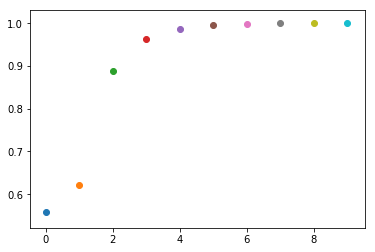

In [6]:
# choose shift point
sig = 0
B = inv(A-sig*np.diag(np.ones_like(D)))

#y = np.dot(Binv,np.ones_like(D)) # start value
x = np.ones(len(D))
for i in range(10) :
    # compute update
    y=np.dot(B,x)
    y_norm=np.linalg.norm(y)
    x=y/y_norm
    lamb=sig+1/y_norm
    plt.scatter(i, lamb)
    pass

In [7]:
print("Smallest EWert found:")
print(lamb) #largest EW
print("corresponding EVector:")
print(x) #corresponding EV

v[:,0] #test für EV

Smallest EWert found:
0.999921202549
corresponding EVector:
[-0.17344864 -0.73653657 -0.21547177 -0.61725309]


array([ 0.17314452,  0.73709037,  0.21540826,  0.61669931])

### Rayleigh Quotient Iteration


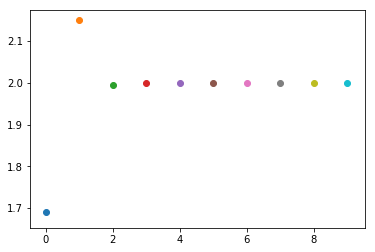

In [8]:
# choose shift point
sig = 1.6
B = inv(A-sig*np.diag(np.ones_like(D)))

#y = np.dot(Binv,np.ones_like(D)) # start value
x = np.ones(len(D))
for i in range(10) :
    
    # compute update
    y=np.dot(B,x)
    y_norm=np.linalg.norm(y)
    x=y/y_norm
    lamb=sig+1/y_norm
    plt.scatter(i, lamb)
    
    # update shift point
    num=np.dot(np.dot(np.transpose(x),A),x)
    den=np.dot(np.transpose(x),x)
    sig=num/den
    try:
        B = inv(A-sig*np.diag(np.ones_like(D)))
    except np.linalg.linalg.LinAlgError as err:
            print("Singular Matrix -> EV found")
    
    pass

In [9]:
print("EWert found:")
print(lamb) # EW
print("corresponding EVector:")
print(x) #corresponding EV

w,v[:,:] #test für EV

EWert found:
2.0
corresponding EVector:
[-0.36761094  0.68018217 -0.06476564 -0.63088812]


(array([ 1.,  4.,  3.,  2.]),
 array([[ 0.17314452, -0.55622662, -0.65739702,  0.36761094],
        [ 0.73709037, -0.43458468, -0.41259759, -0.68018217],
        [ 0.21540826,  0.52119875, -0.10626688,  0.06476564],
        [ 0.61669931,  0.47968736, -0.62153015,  0.63088812]]))

### Higher Eigenvalues

We do vector iteration with vectors orthogonal to the already computed eigenvalue.
It is necessary to enforce the orthogonality during iteration.


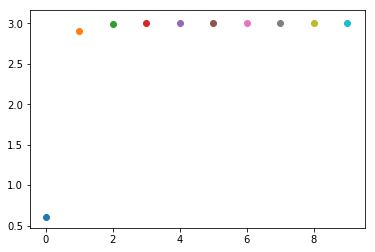

In [10]:
W,V = eig(A)
Is = np.argsort(W)
W[Is],V[:,Is]

def proj(v,u) :
    from numpy import inner
    # project v on u
    return inner(u,v)/inner(u,u)*u

# choose shift point
sig = 0
B = inv(A-sig*np.diag(np.ones_like(D)))

# start with vector orthogonal to first EV
v1 = V[:,Is[0]] # first EV 
v2 = V[:,Is[1]] # second EV 
b1 = np.ones_like(D)-proj(v1,np.ones_like(D))-proj(v2,np.ones_like(D))
b = b1
for i in range(10) :
    # re - orthogonalize
    b = b - proj(b,v1) - proj(b,v2)
    # inverse vector iteration
    y=np.dot(B,b)
    y_norm=np.linalg.norm(y)
    b=y/y_norm
    
    lamb=sig+1/y_norm
    plt.scatter(i, lamb)
   
    pass

In [11]:
print("3rd EWert found:")
print(lamb) # EW
print("corresponding EVector:")
print(b) #corresponding EV

W[Is[2]],V[:,Is[2]] #test für EV

### IMPORTANT: Test for EV FAILED!?!?!
b/V[:,Is[2]]

3rd EWert found:
2.99933112601
corresponding EVector:
[-0.02818416 -0.56753983 -0.26898526 -0.77765746]


array([ 0.04287236,  1.37552872,  2.53122387,  1.25119828])

## QR-Algorithm

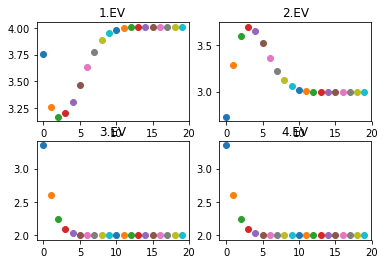

In [12]:
np.random.seed(1)
D = np.array([1, 2, 3 ,4])
S = (np.random.rand(len(D),len(D)) - 0.5)*2 # compute a random matrix with entries between -1 and 1
Aalt = np.dot(np.dot(S,np.diag(D)),inv(S)) # S*D*S^-1, computes a unitary similar matrix of D having the same EVs

wh=20
Aalt
for i in range(wh) :
    Q,R = np.linalg.qr(Aalt)
    Aalt = np.dot(R,Q)
    
    plt.subplot(2, 2, 1)
    plt.plot(i, Aalt[0,0], 'o')
    plt.title('1.EV')

    plt.subplot(2, 2, 2)
    plt.plot(i, Aalt[1,1], 'o')
    plt.title('2.EV')
    
    plt.subplot(2, 2, 3)
    plt.plot(i, Aalt[2,2], 'o')
    plt.title('3.EV')
    
    plt.subplot(2, 2, 4)
    plt.plot(i, Aalt[2,2], 'o')
    plt.title('4.EV')
    
    pass
plt.show()



## subspace-iteration

In [13]:
#code here

## FE-Matrices

### Load the Matrices

Load the system matrices.
The matices are real, square and symmetric with dimension $3N \times 3N$.
The DoFs are arranged in the order $x_1, y_1, z_1, x_2, \dots, z_N$ where $x_i$ denotes the x-displacement of node $i$.

In [14]:
M = mmread('Ms.mtx').toarray() # mass matrix
K = mmread('Ks.mtx').toarray() # stiffness matrix
X = mmread('X.mtx') # coodinate matrix with columns corresponding to x,y,z position of the nodes

N = X.shape[0] # number of nodes

FileNotFoundError: [Errno 2] No such file or directory: 'Ms.mtx'

The DoFs in the system matrices are arranged according to a regular grid of linear finite elements.
In the following we determine the unique x, y, and z coodinates of the grid.

In [ ]:
nprec = 6 # precision for finding uniqe values
# get grid vectors (the unique vectors of the x,y,z coodinate-grid)
x = np.unique(np.round(X[:,0],decimals=nprec))
y = np.unique(np.round(X[:,1],decimals=nprec))
z = np.unique(np.round(X[:,2],decimals=nprec))
print('Nx =',len(x))
print('Ny =',len(y))
print('Nz =',len(z))
# grid matrices
Xg = np.reshape(X[:,0],[len(y),len(x),len(z)])
Yg = np.reshape(X[:,1],[len(y),len(x),len(z)])
Zg = np.reshape(X[:,2],[len(y),len(x),len(z)])
# or equivalent: Xg,Yg,Zg  = np.meshgrid(x,y,z)

### Plot the Geometry

One can plot the location of the nodes, select subsets of nodes and plot them ...

In [ ]:
# plot the geometric points 
from mpl_toolkits.mplot3d import Axes3D
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})

#sm = 0.1/mode.max()
ax.scatter(X[:,0],X[:,1],X[:,2],s=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# select nodes on the west-side, i.e. at x=x_min
tol = 1e-12
x_min = X[:,0].min()
Nw = np.argwhere(np.abs(X[:,0]-x_min)<tol) # Node indices of West-Edge nodes

# select node on North-East-Top corner
Nnet = np.argwhere(np.all(np.abs(X-X.max(axis=0))<tol,axis=1))[0]

ax.scatter(X[Nw,0],X[Nw,1],X[Nw,2],s=30,marker='x',label='West')
ax.scatter(X[Nnet,0],X[Nnet,1],X[Nnet,2],s=30,marker='x',label='North-East-Top')
ax.legend()

### Solve a Static Problem

Solve a static problem applying nodal forces to the North-East-Top corner and fixing all DoF at the West-Edge of the plate.

We solve the system
$$ K u = f $$
for the displacements $u$.
The system needs to be constrained, thus, we select nodes which will be removed from the system.

In [ ]:

# because the dofs are ordered as x_1, y_1, z_1, x_2, ..., z_N in the global system, the x, y, and z dofs for node n are
# located at position 3n, 3n+1, 3n+2.

# indices of x, y, and z DoFs in the global system
# can be used to get DoF-index in global system, e.g. for y of node n by Iy[n]
Ix = np.arange(N)*3 # index of x-dofs
Iy = np.arange(N)*3+1
Iz = np.arange(N)*3+2

# select which indices in the global system must be constrained
If = np.array([Ix[Nw],Iy[Nw],Iz[Nw]]).ravel() # dof indices of fix constraint
Ic = np.array([(i in If) for i in np.arange(3*N)]) # boolean array of constraind dofs

# construct forcing vector
f = np.zeros(3*N)
f[Iz[Nnet]] = -1.0

# compute the reduced system
Kc = K[np.ix_(~Ic,~Ic)]
fc = f[~Ic]

# compute solution
u = np.zeros(3*N) # initialize displacement vector

# solve the linear system Kc*uc=fc
uc = np.linalg.solve(Kc,fc)

# sort solution in large vector
u[~Ic] = uc

In [ ]:
# plot in 3D
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})

#sm = 0.1/mode.max()
ax.scatter(X[:,0],X[:,1],X[:,2],s=5,label='undeformed') # undeformed

# format U like X
U = np.array([u[Ix],u[Iy],u[Iz]]).T

# scale factor for plotting
s = 0.5/np.max(np.sqrt(np.sum(U**2,axis=0)))
Xu = X + s*U # defomed configuration (displacement scaled by s)

ax.scatter(Xu[:,0],Xu[:,1],Xu[:,2],c='g',label='deformed')
ax.scatter(X[Nw,0],X[Nw,1],X[Nw,2],s=50,marker='x',label='constraint')
ax.quiver(X[:,0],X[:,1],X[:,2],f[Ix],f[Iy],f[Iz],color='r',length=0.1,label='load')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

In [ ]:
# plot in 2D (z-displacement of the top-nodes)

# select nodes
Nt = np.argwhere(np.abs(X[:,2]-X[:,2].max())<tol)
# extract z-displacements
uz = np.reshape(u[Iz[Nt]],[len(y),len(x)])

lim = np.max(np.abs(uz)) # limit to center color legend around 0

fig,ax = plt.subplots()
cax = ax.contourf(x,y,uz,cmap=plt.get_cmap('RdBu_r'),vmin=-lim,vmax=lim)
fig.colorbar(cax,extend='both')#,orientation='horizontal')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

### Compute eigenvalues and modeshapes

#### All free
Use the unconstrained system

In [ ]:
# only compute a subset of modes
from scipy.linalg import eigh
k = 15
W,V = eigh(K,M,eigvals=(0,k))


#### Clamped edges
#### Short side clamped